In [218]:
import pandas as pd 
import matplotlib.pyplot as plt 
data = pd.read_csv('data.csv')
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From the description of the dataset, there are no set of missing values. The average age of an employee in the organization is about 37 years making about $802 per day ($66 per hour)

In [188]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

We need to convert the categorical variables to numerical values so that our model can understand it better.  Since we are concerned with finding the factors contributing to an employee's attrition, this is a classification that can be solved using the Decision Trees model.

In [204]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
encoder = LabelEncoder()
scale = StandardScaler()
data['Attrition'] = encoder.fit_transform(data['Attrition'])
data['BusinessTravel'] = encoder.fit_transform(data['BusinessTravel'])
data['Department'] = encoder.fit_transform(data['Department'])
data['EducationField'] = encoder.fit_transform(data['EducationField'])
data['Gender'] = encoder.fit_transform(data['Gender'])
data['JobRole'] = encoder.fit_transform(data['JobRole'])
data['MaritalStatus'] = encoder.fit_transform(data['MaritalStatus'])
data['Over18'] = encoder.fit_transform(data['Over18'])
data['OverTime'] = encoder.fit_transform(data['OverTime'])
x = data.drop(columns = ['Attrition'], axis = 1)
y = data[['Attrition']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)
#x_train = scale.fit_transform(x_train)
#x_test = scale.transform(x_test)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


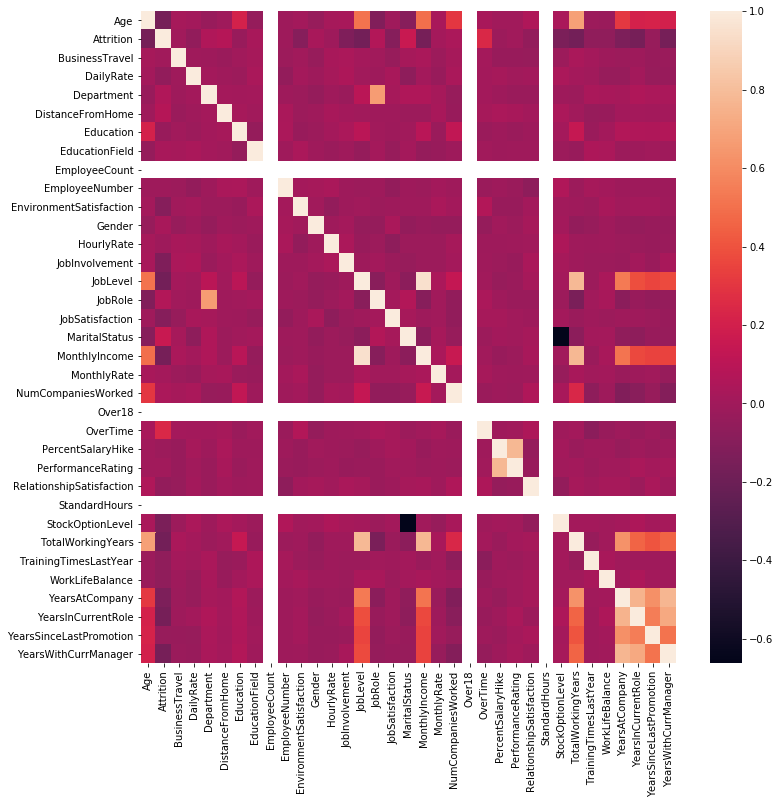

In [205]:
import seaborn as sns
#Finding the correlation Matrix
plt.figure(figsize=(12,12))
sns.heatmap(data.corr())

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 5)
clf = model.fit(x_train, y_train)
ans = clf.predict(x_test)
out = accuracy_score(y_test, ans)
out

0.8503401360544217

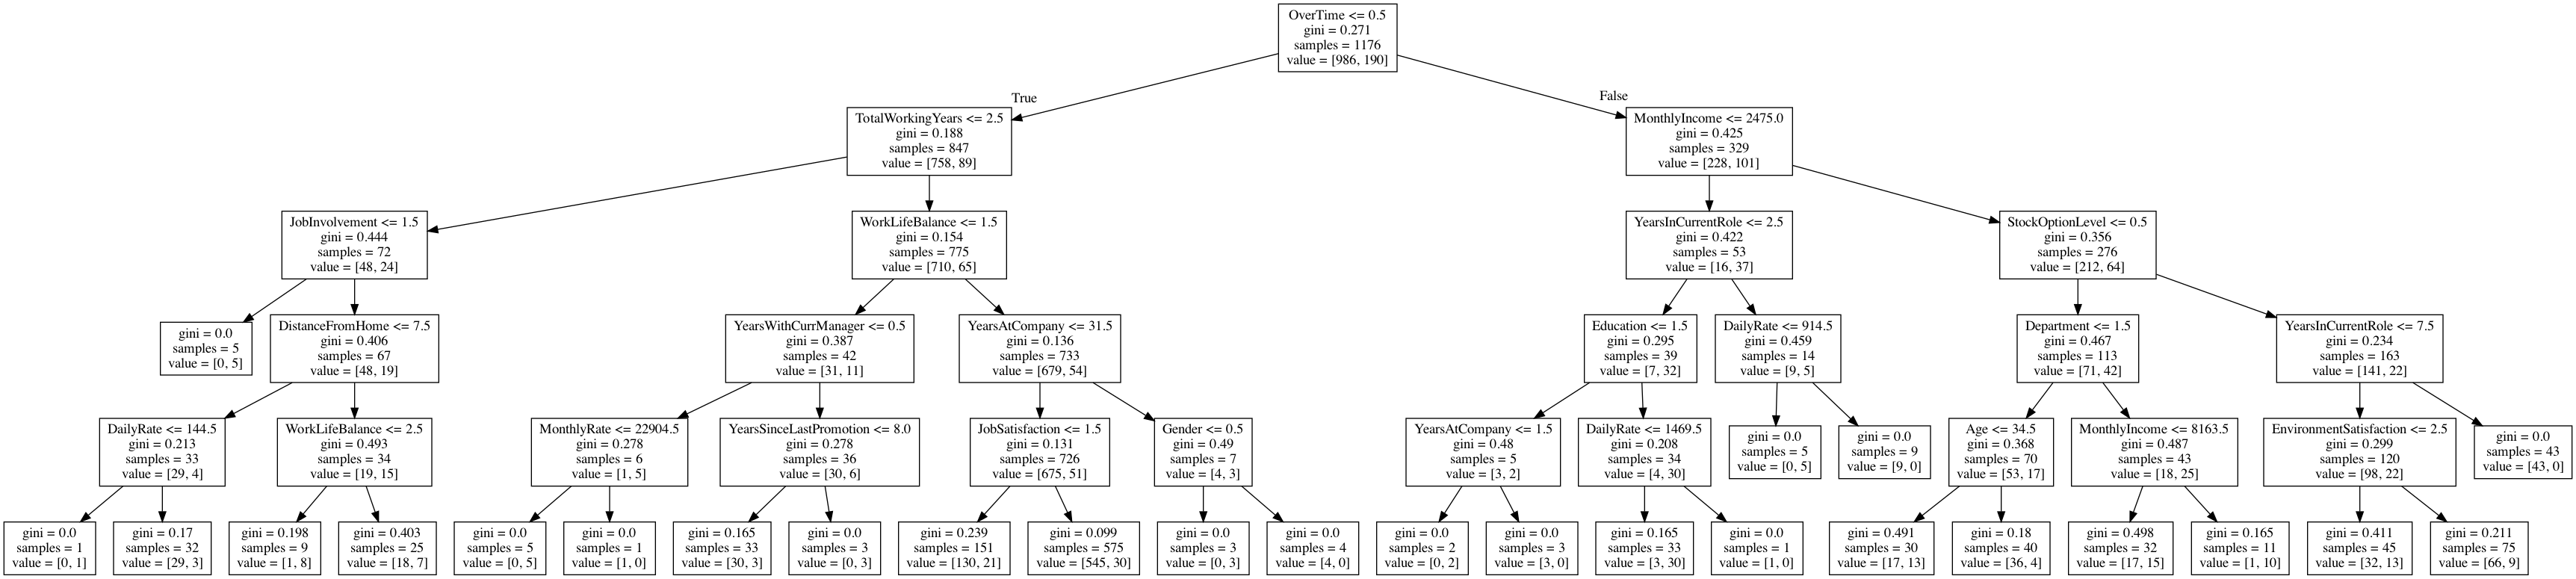

In [209]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
features = list(x.columns)
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

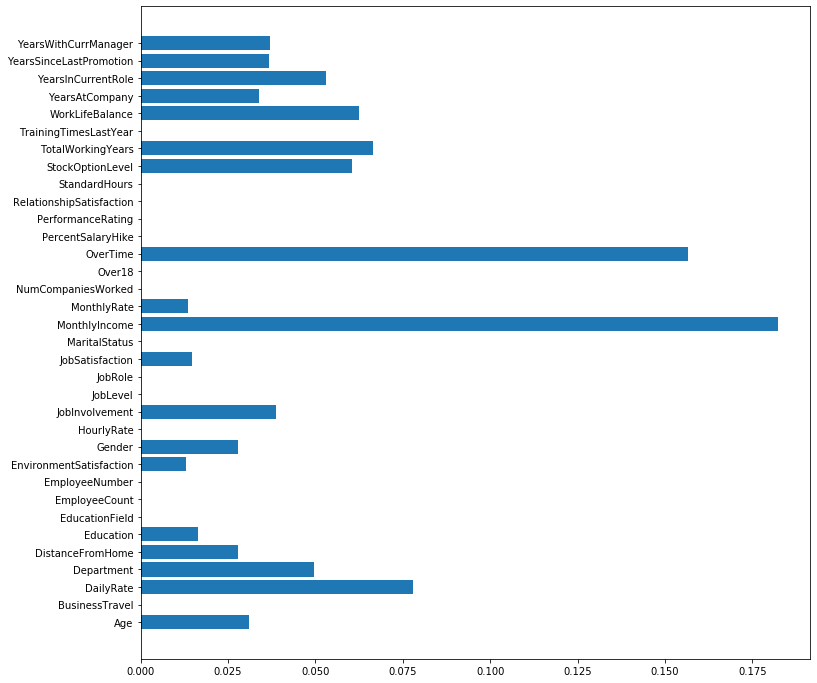

In [210]:
importance = clf.feature_importances_
# summarize feature importance
plt.figure(figsize=(12,12))
plt.barh(features, importance)
plt.show()

Text(0.5, 1.0, 'JobRole distribution')

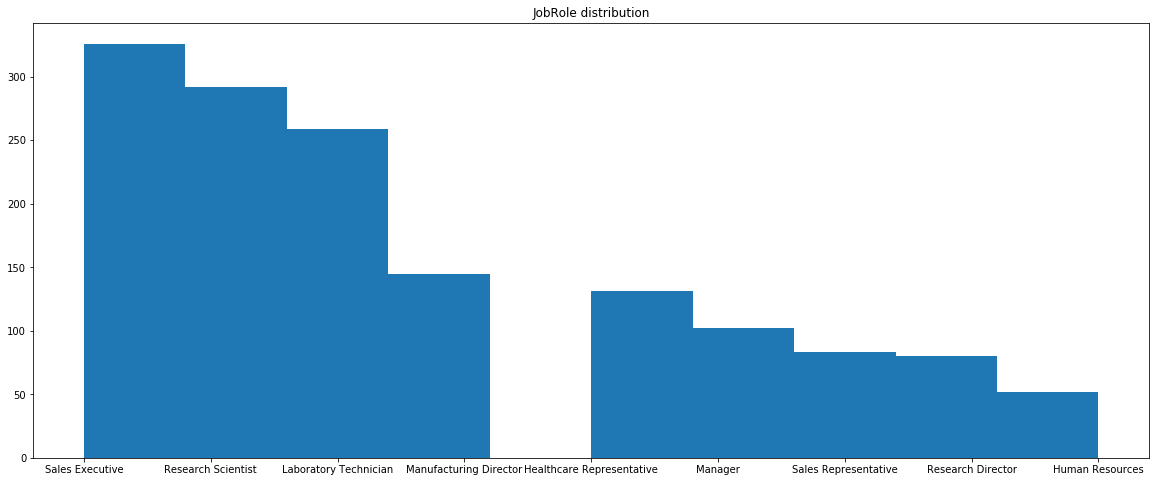

In [194]:
plt.figure(figsize=(20,8))
plt.hist(data['JobRole'])
plt.title('JobRole distribution')

Text(0.5, 1.0, 'Age distribution')

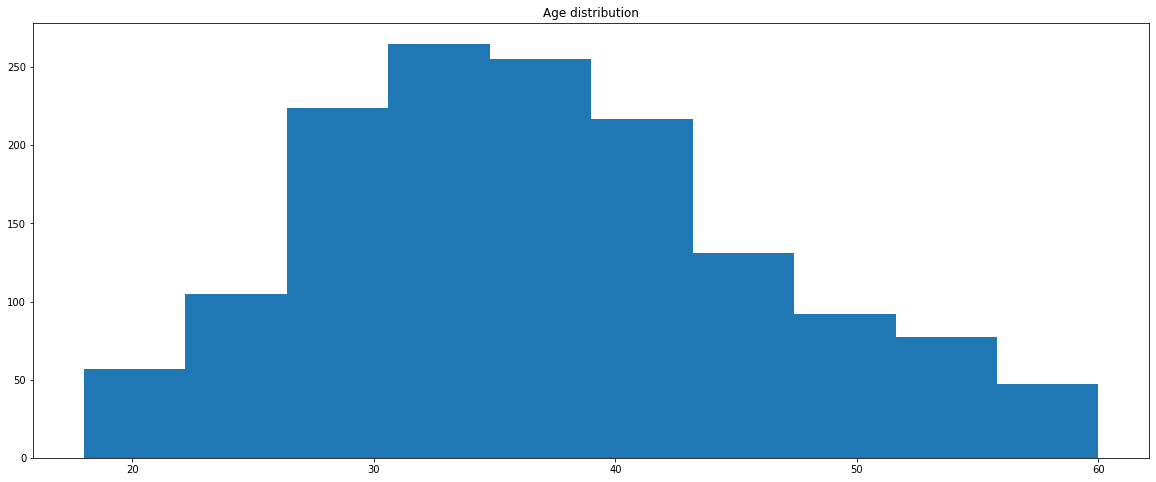

In [195]:
plt.figure(figsize=(20,8))
plt.hist(data['Age'])
plt.title('Age distribution')

Text(0.5, 1.0, 'Monthly Income distribution')

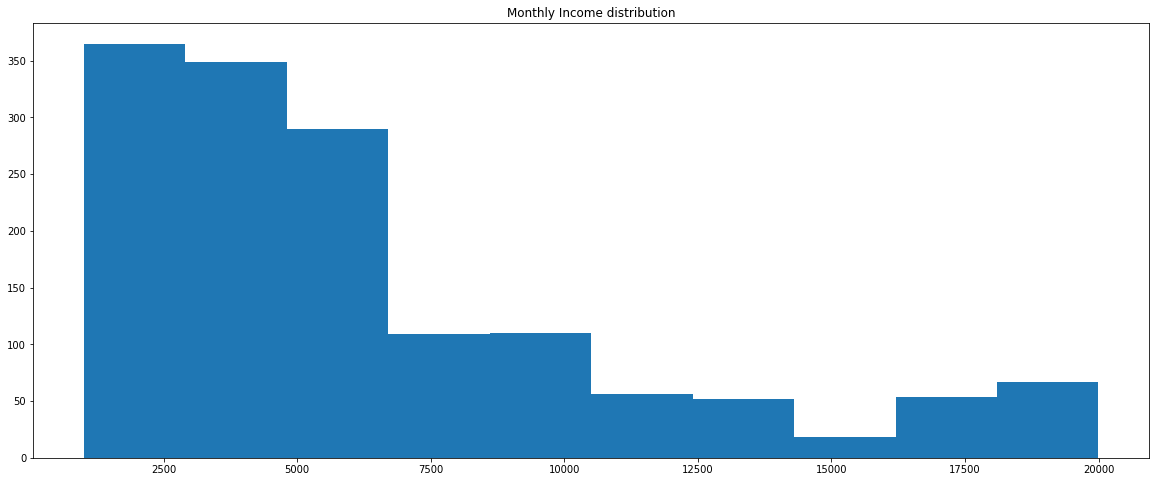

In [196]:
plt.figure(figsize=(20,8))
plt.hist(data['MonthlyIncome'])
plt.title('Monthly Income distribution')

Text(0.5, 1.0, 'Job Role vs Number of Employees')

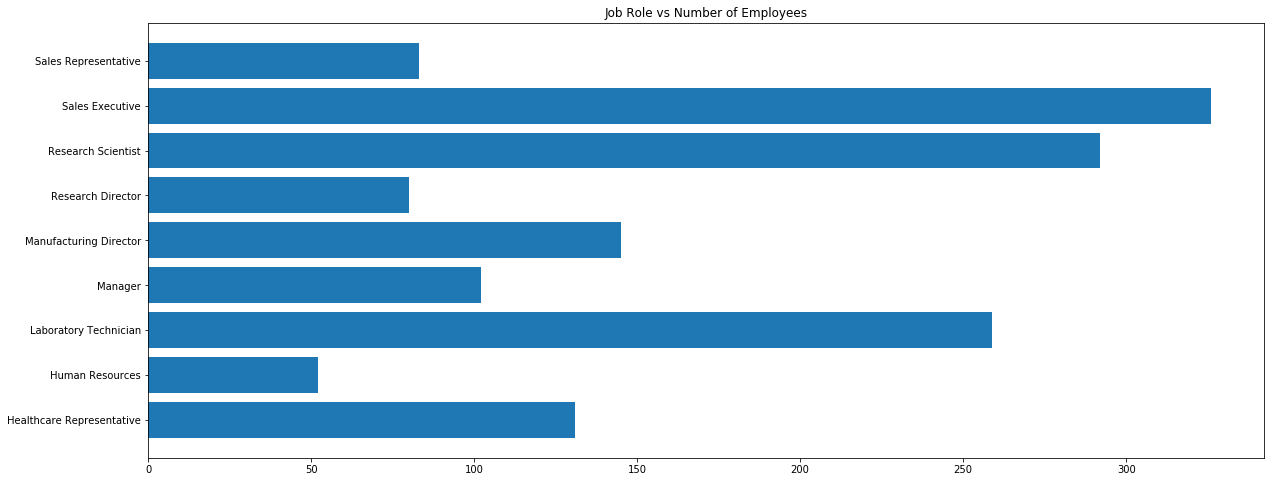

In [197]:
plt.figure(figsize=(20,8))
data5 = data.groupby(['JobRole'])['EmployeeCount'].count()
data5 = data5.to_frame()
plt.barh(data5.index, data5['EmployeeCount'])
plt.title('Job Role vs Number of Employees')

Text(0.5, 1.0, 'Job Role vs Median Age of Employees')

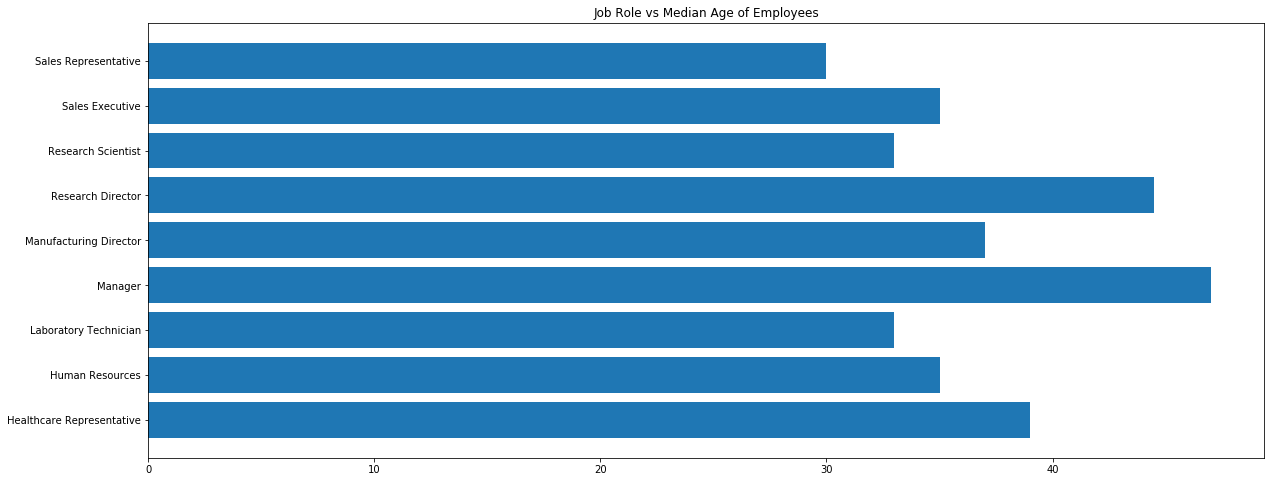

In [198]:
plt.figure(figsize=(20,8))
data1 = data.groupby(['JobRole'])['Age'].median()
data1 = data1.to_frame()
plt.barh(data1.index, data1['Age'])
plt.title('Job Role vs Median Age of Employees')

Text(0.5, 1.0, 'Job Role vs Median Salary of Employees')

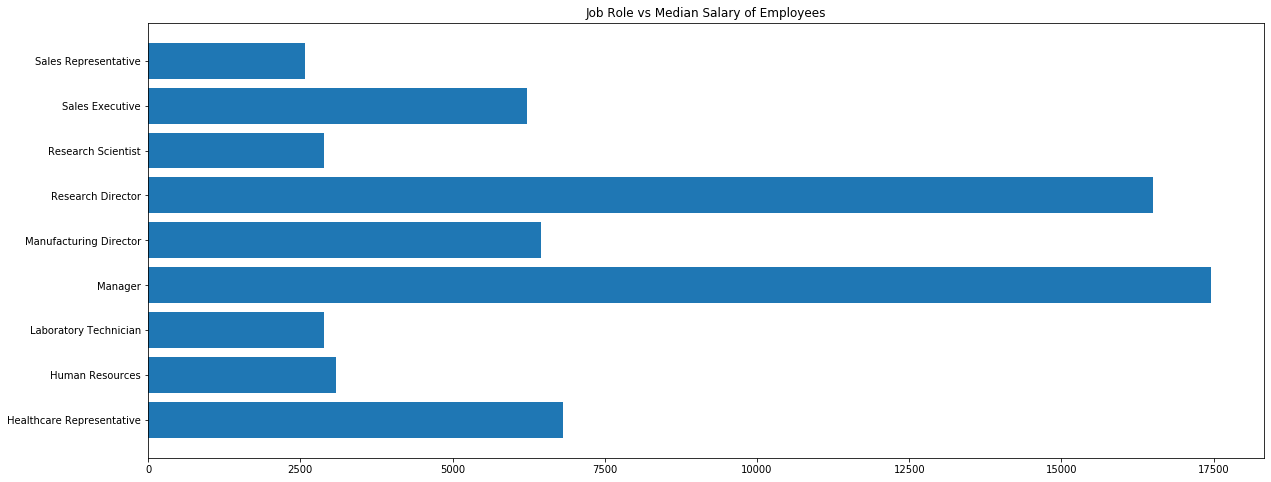

In [199]:
data2 = data.groupby(['JobRole'])['MonthlyIncome'].median()
data2 = data2.to_frame()
plt.figure(figsize=(20,8))
plt.barh(data2.index, data2['MonthlyIncome'])
plt.title('Job Role vs Median Salary of Employees')

Text(0.5, 1.0, 'Job Role vs average years since last promotion for a typical employee')

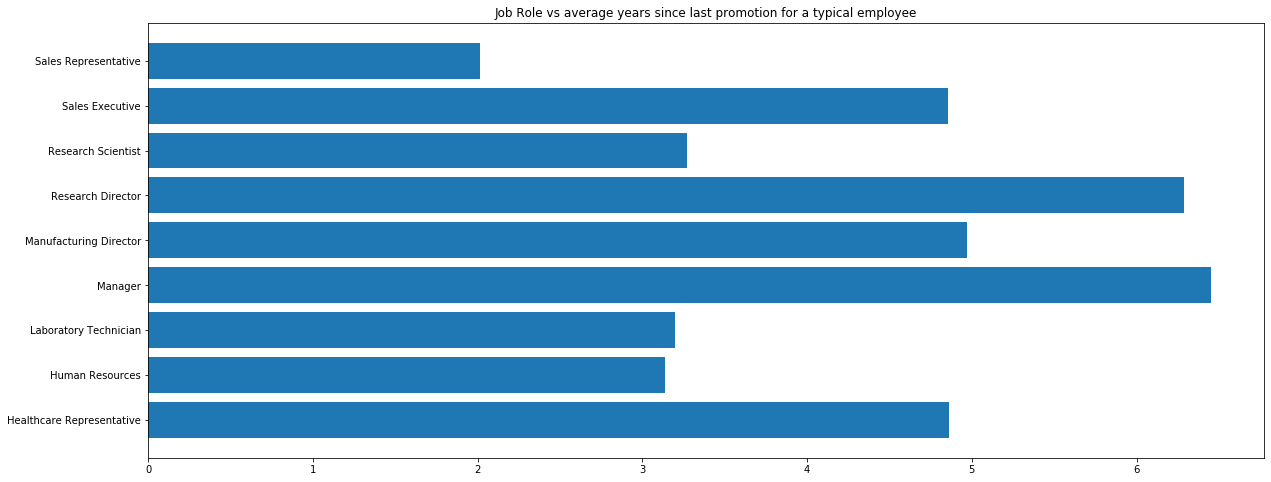

In [200]:
data3 = data.groupby(['JobRole'])['YearsInCurrentRole'].mean()
data3 = data3.to_frame()
plt.figure(figsize=(20,8))
plt.barh(data3.index, data3['YearsInCurrentRole'])
plt.title('Job Role vs average years since last promotion for a typical employee')

Text(0.5, 1.0, 'Job Role vs Median years in current role of a typical employee')

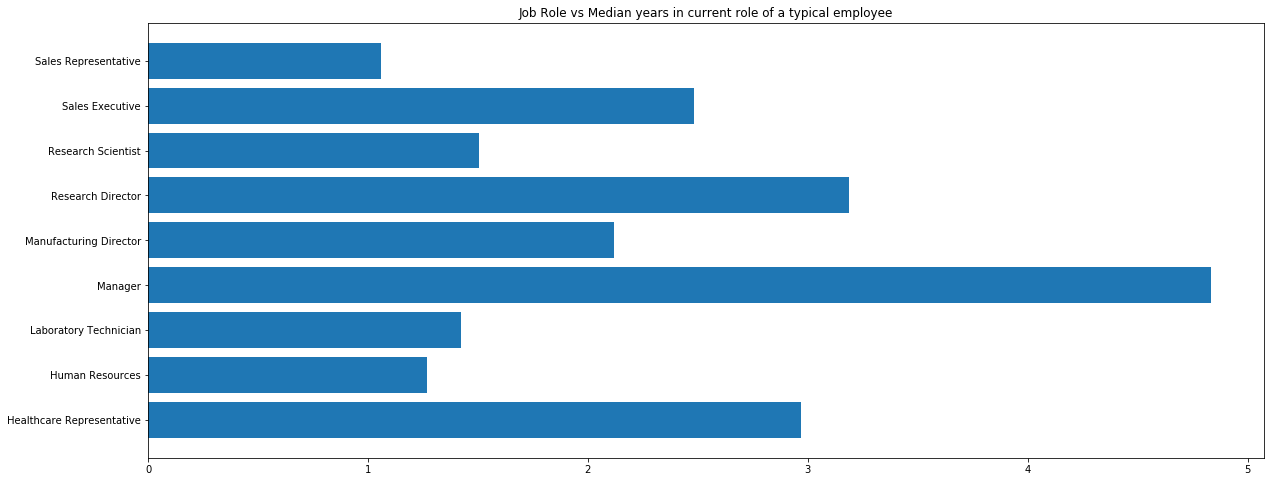

In [201]:
data3 = data.groupby(['JobRole'])['YearsSinceLastPromotion'].mean()
data3 = data3.to_frame()
plt.figure(figsize=(20,8))
plt.barh(data3.index, data3['YearsSinceLastPromotion'])
plt.title('Job Role vs Median years in current role of a typical employee')

Text(0.5, 1.0, 'Job Role vs Employees worked overtime')

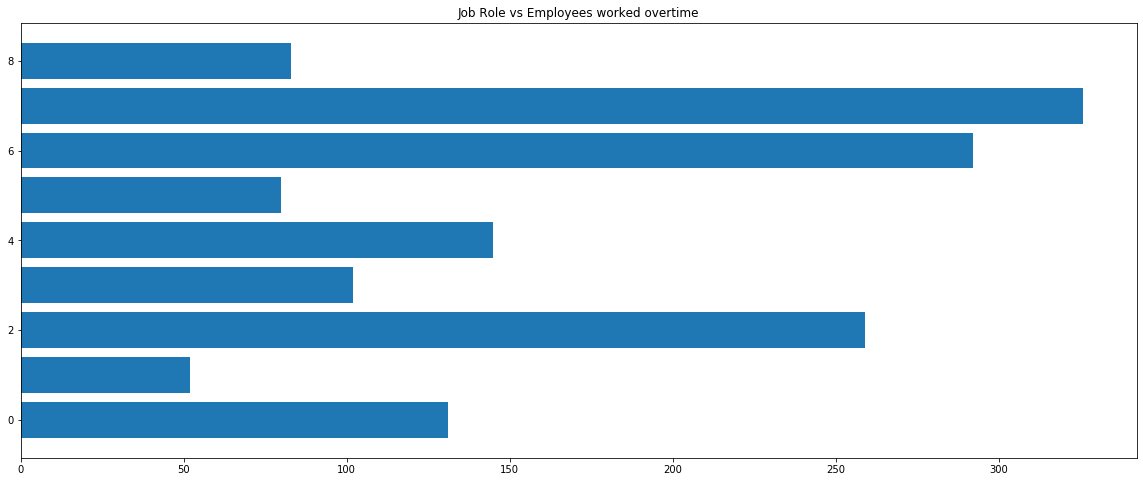

In [217]:
data4 = data.groupby(['JobRole'])['OverTime'].count()
data4 = data4.to_frame()
plt.figure(figsize=(20,8))
plt.barh(data4.index, data4['OverTime'])
plt.title('Job Role vs Employees worked overtime')

Text(0.5, 1.0, 'Job Role vs Employees who resigned')

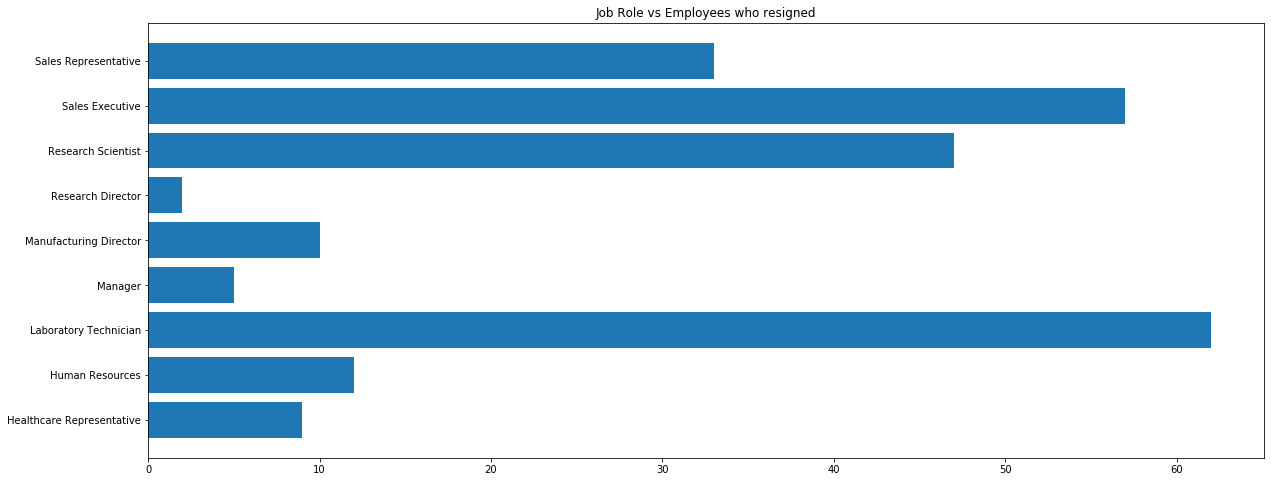

In [219]:
data6 = data[data['Attrition'] == 'Yes']
data6 = data6.groupby('JobRole')['EmployeeCount'].count()
data6 = data6.to_frame()
plt.figure(figsize=(20,8))
plt.barh(data6.index, data6['EmployeeCount'])
plt.title('Job Role vs Employees who resigned')

This feature importance shows the factors that affects the decision for employees to continue working or not. The top 5 factors are overtime, Monthly Income, age, Job Role, and Years in current role. To get a better understanding of the picture, I plotted the distribution of Monthly income, Job Role, and Age in the company. The median income of an employee is about $4919.00. The median age of employee is 36 years old. Looking at the Job Roles with respect to the number of employees and the median salary, most entry level and typical job roles for median aged candidates in the company are Sales Rep, Lab technician, Research Scientist, Human Resources. Employees in these role typically earn about $3000, much lower than the median earnings of an employee in the overall company. Moreover, employees in these job roles have not recieved a job promotion in about 3 years and on average, about 100-200 employees work overtime depending on the job role. For analysis purposes, we will focus on the four job roles mentioned.

Coming to the main point regarding why most employees are quitting. As mentioned previously, the median age of an employee in the organization is 36. Most employees around this age are married and have a family. The monthly income of the common job role in the company is about $3000-$4000 per month which is about $48,000. In today's generation, it is significantly difficult to support a family with that much money. They are earning much lower than the typical employee's median monthly income in the company. Moreover, employees working in these job roles are working overtime despite low median pay and do not receive a promotion in the past 3 years on average. In career perspective's, an employee, especially those who have started in the workforce, are constantly in perspective to leverage their career ahead. With an average of 3-4 years since last promotion, this encourages employees to look for opportunities elsewhere that can understand their talent and skills accquired over time based on work experience. Hence, lack of good monthly income, overtime work despite receiving low monthly income, and lack of expedited career growth are factors that encourages employees to look for other work opportunities.